In [71]:
import pandas as pd
import numpy as np
import json
import re
from nltk.tokenize import RegexpTokenizer, word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
from scipy.spatial.distance import pdist, squareform

In [72]:
dataML = pd.read_pickle(r'bareMLdata.pkl')

In [87]:
dataML

,cuisine,ingredients_list,seperated_ingredients,ingredients
0,Mexican,"[tortillas, extra virgin olive oil, garlic, mo...","tortillas,extra virgin olive oil,garlic,mozzar...",tortillas extra virgin olive oil garlic mozzar...
1,South Indian Recipes,"[sesame (gingelly) oil, mustard seeds, curry l...","sesame gingelly oil,mustard seeds,curry leaves...",sesame gingelly oil mustard seeds curry leaves...
2,Mexican,"[extra virgin olive oil, pineapple, white onio...","extra virgin olive oil,pineapple,white onion,r...",extra virgin olive oil pineapple white onion r...
3,Karnataka,"[arhar dal (split toor dal), turmeric powder (...","arhar dal split toor dal,turmeric powder haldi...",arhar dal split toor dal turmeric powder haldi...
4,North Indian Recipes,"[rajma (large kidney beans), cashew nuts, sult...","rajma large kidney beans,cashew nuts,sultana r...",rajma large kidney beans cashew nuts sultana r...
...,...,...,...,...
7967,Italian Recipes,"[spirali pasta, onions, tomato, green zucchini...","spirali pasta,onions,tomato,green zucchini,car...",spirali pasta onions tomato green zucchini car...
7968,Hyderabadi,"[arhar dal (split toor dal), tomato, turmeric ...","arhar dal split toor dal,tomato,turmeric powde...",arhar dal split toor dal tomato turmeric powde...
7969,Karnataka,"[turmeric powder (haldi), sugar, salt, fresh c...","turmeric powder haldi,sugar,salt,fresh coconut...",turmeric powder haldi sugar salt fresh coconut...
7970,Indian,"[beetroot, amla (nellikai/ gooseberry), mint l...","beetroot,amla nellikai/ gooseberry,mint leaves...",beetroot amla nellikai/ gooseberry mint leaves...


In [77]:
dataML.isna().sum()

cuisine                  0
ingredients_list         0
seperated_ingredients    0
dtype: int64

In [75]:
dataML = dataML.dropna()

In [76]:
dataML.shape

(7922, 3)

In [78]:
dataML['ingredients'] = dataML['ingredients_list'].apply(lambda x: ' '.join(x))

<ipython-input-78-9f9618371ba2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
# Define a function to perform both stemming and tokenization
def tokenizer(text):
    
    # Tokenize by sentence, then by word
    tokens = [word for text in sent_tokenize(text) for word in word_tokenize(text)]
    
       
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.match(r'[A-ZÄÖÜ][a-zäöüß]+', token)]
    
    return filtered_tokens

In [89]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer,lowercase=False)

In [82]:
tfidf_vectorizer

TfidfVectorizer(lowercase=False,
                tokenizer=<function tokenizer at 0x7fb0e917b8b0>)

In [50]:
[x for x in dataML['ingredients']]

['tortillas extra virgin olive oil garlic mozzarella cheese red yellow or green bell pepper (capsicum) onions kalmatta olives button mushrooms',
 'sesame (gingelly) oil mustard seeds curry leaves garlic pearl onions (sambar onions) tomato tamarind turmeric powder (haldi) salt jaggery',
 'extra virgin olive oil pineapple white onion red yellow and green bell peppers (capsicum) pickled jalapenos coriander (dhania) leaves mint leaves (pudina) salt lemon juice paprika powder',
 'arhar dal (split toor dal) turmeric powder (haldi) salt dry red chilli mustard seeds asafoetida (hing) curry leaves coriander (dhania) leaves',
 'rajma (large kidney beans) cashew nuts sultana raisins asafoetida (hing) cumin seeds (jeera) gram flour (besan) red chilli powder coriander (dhania) leaves poppy seeds fresh cream milk water salt saffron strands',
 'barnyard millet oil bay leaf (tej patta) cardamom (elaichi) pods/seeds cloves (laung) cinnamon stick (dalchini) star anise curry leaves green chilli garlic gi

In [64]:
dataML = re.sub(r'\b\w{1,2}\b', '', dataML)

TypeError: expected string or bytes-like object

In [65]:
def clean(test):
    test = re.sub(r'\b\w{1,2}\b', '', test)
    return test

In [86]:
dataML = dataML.replace(to_replace='\)', value="", regex=True)

In [66]:
dataML = lambda x: clean(x)

In [90]:
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in dataML['ingredients']])

print(tfidf_matrix.shape)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [52]:
tfidf_matrix

NameError: name 'tfidf_matrix' is not defined

In [27]:
dataML.loc[dataML['ingredients'].str.contains(r'[:ascii:]+') == False]

,cuisine,ingredients_list,seperated_ingredients,ingredients


In [25]:
dataML = dataML[~dataML['ingredients'].str.contains(r'[^\x00-\x7F]')]

In [109]:
dataML.shape

(7922, 4)

In [28]:
dataML.to_pickle("bareMLdataNoHindi.pkl")

In [92]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from IPython.display import display, HTML
import itertools

In [96]:
data = pd.read_csv("recipes_CLEANED.csv")

In [105]:
data = data.drop(['tags','category'], 1)

In [107]:
data['ingredients_strings'] = data['ingredients_strings'].astype(str)

In [108]:
data

,recipe_title,cuisine,diet,ingredients_list,ingredients_strings
0,Roasted Peppers And Mushroom Tortilla Pizza Re...,Mexican,Vegetarian,"['tortillas', 'extra virgin olive oil', 'garli...","['tortillas', 'extra virgin olive oil', 'garli..."
1,"Thakkali Gotsu Recipe , Thakkali Curry , Spi...",South Indian Recipes,Vegetarian,"['sesame (gingelly) oil', 'mustard seeds', 'cu...","['sesame (gingelly) oil', 'mustard seeds', 'cu..."
2,Spicy Grilled Pineapple Salsa Recipe,Mexican,Vegetarian,"['extra virgin olive oil', 'pineapple', 'white...","['extra virgin olive oil', 'pineapple', 'white..."
3,Karwar Style Dali Thoy Recipe - Toor dal Curry,Karnataka,High Protein Vegetarian,"['arhar dal (split toor dal)', 'turmeric powde...","['arhar dal (split toor dal)', 'turmeric powde..."
4,Rajma Kofta In Milk And Poppy Seed Gravy Recipe,North Indian Recipes,High Protein Vegetarian,"['rajma (large kidney beans)', 'cashew nuts', ...","['rajma (large kidney beans)', 'cashew nuts', ..."
...,...,...,...,...,...
7967,Zucchini and Carrot Pasta Recipe,Italian Recipes,Vegetarian,"['spirali pasta', 'onions', 'tomato', 'green z...","['spirali pasta', 'onions', 'tomato', 'green z..."
7968,Hyderabadi Khatti Dal Recipe (Hyderabadi Tangy...,Hyderabadi,High Protein Vegetarian,"['arhar dal (split toor dal)', 'tomato', 'turm...","['arhar dal (split toor dal)', 'tomato', 'turm..."
7969,Karwar Style Muga Ambat Recipe (Moong Sprouts ...,Karnataka,High Protein Vegetarian,"['turmeric powder (haldi)', 'sugar', 'salt', '...","['turmeric powder (haldi)', 'sugar', 'salt', '..."
7970,"Beetroot, Amla And Pudina Juice Recipe , Mint...",Indian,Vegetarian,"['beetroot', 'amla (nellikai/ gooseberry)', 'm...","['beetroot', 'amla (nellikai/ gooseberry)', 'm..."


In [111]:
dataML['recipe_title'] = data['recipe_title']
dataML


,cuisine,ingredients_list,seperated_ingredients,ingredients,recipe_title
0,Mexican,"[tortillas, extra virgin olive oil, garlic, mo...","tortillas,extra virgin olive oil,garlic,mozzar...",tortillas extra virgin olive oil garlic mozzar...,Roasted Peppers And Mushroom Tortilla Pizza Re...
1,South Indian Recipes,"[sesame (gingelly) oil, mustard seeds, curry l...","sesame gingelly oil,mustard seeds,curry leaves...",sesame gingelly oil mustard seeds curry leaves...,"Thakkali Gotsu Recipe , Thakkali Curry , Spi..."
2,Mexican,"[extra virgin olive oil, pineapple, white onio...","extra virgin olive oil,pineapple,white onion,r...",extra virgin olive oil pineapple white onion r...,Spicy Grilled Pineapple Salsa Recipe
3,Karnataka,"[arhar dal (split toor dal), turmeric powder (...","arhar dal split toor dal,turmeric powder haldi...",arhar dal split toor dal turmeric powder haldi...,Karwar Style Dali Thoy Recipe - Toor dal Curry
4,North Indian Recipes,"[rajma (large kidney beans), cashew nuts, sult...","rajma large kidney beans,cashew nuts,sultana r...",rajma large kidney beans cashew nuts sultana r...,Rajma Kofta In Milk And Poppy Seed Gravy Recipe
...,...,...,...,...,...
7967,Italian Recipes,"[spirali pasta, onions, tomato, green zucchini...","spirali pasta,onions,tomato,green zucchini,car...",spirali pasta onions tomato green zucchini car...,Zucchini and Carrot Pasta Recipe
7968,Hyderabadi,"[arhar dal (split toor dal), tomato, turmeric ...","arhar dal split toor dal,tomato,turmeric powde...",arhar dal split toor dal tomato turmeric powde...,Hyderabadi Khatti Dal Recipe (Hyderabadi Tangy...
7969,Karnataka,"[turmeric powder (haldi), sugar, salt, fresh c...","turmeric powder haldi,sugar,salt,fresh coconut...",turmeric powder haldi sugar salt fresh coconut...,Karwar Style Muga Ambat Recipe (Moong Sprouts ...
7970,Indian,"[beetroot, amla (nellikai/ gooseberry), mint l...","beetroot,amla nellikai/ gooseberry,mint leaves...",beetroot amla nellikai/ gooseberry mint leaves...,"Beetroot, Amla And Pudina Juice Recipe , Mint..."


In [151]:
res = dataML.recipe_title.mode()
res

0                    15 Minutes Mexican Fried Rice Recipe
1                 15 minute Cauliflower Fried Rice Recipe
2          2 minutes-Eggless Microwave Chocolate Mug Cake
3                      3 Beans Stuffed Quesadillas Recipe
4       3 Ingredients Banana Ice Cream Recipe - Health...
                              ...                        
7917    हैदराबादी बिरयानी रेसिपी - Hyderabadi Biryani ...
7918    हैदराबादी वेजिटेबल बिरयानी रेसिपी - Hyderabadi...
7919    हैदराबादी शाही मिक्स्ड वेजिटेबल करी रेसिपी - H...
7920    होल वीट लच्छा पराठा रेसिपी - Whole Wheat Lachh...
7921                  ​​​​​​​Caramel Bread Pudding Recipe
Length: 7922, dtype: object

In [116]:
def convert_to_dict(lst):
    d = {} #empty dict
    for ingre in lst:
        d[ingre] = 1
    return d

In [117]:
dataML["bagofwords"] = dataML.seperated_ingredients.str.split(",").apply(convert_to_dict)
print(dataML.bagofwords)

0       {'tortillas': 1, 'extra virgin olive oil': 1, ...
1       {'sesame gingelly oil': 1, 'mustard seeds': 1,...
2       {'extra virgin olive oil': 1, 'pineapple': 1, ...
3       {'arhar dal split toor dal': 1, 'turmeric powd...
4       {'rajma large kidney beans': 1, 'cashew nuts':...
                              ...                        
7967    {'spirali pasta': 1, 'onions': 1, 'tomato': 1,...
7968    {'arhar dal split toor dal': 1, 'tomato': 1, '...
7969    {'turmeric powder haldi': 1, 'sugar': 1, 'salt...
7970    {'beetroot': 1, 'amla nellikai/ gooseberry': 1...
7971    {'cauliflower gobi': 1, 'pearl onions sambar o...
Name: bagofwords, Length: 7922, dtype: object


In [118]:
#one hot encoding
vector_dict = DictVectorizer(sparse = False)
X = vector_dict.fit_transform(dataML["bagofwords"].tolist())
y = dataML.cuisine.astype("category").cat.codes

In [119]:
ing_arr = np.zeros((X.shape[1], X.shape[1]))
ing_arr.shape

(1783, 1783)

In [120]:
#trying 10 cuisines for clustering

dish_name_list = dataML.cuisine.astype("category").cat.categories

dish_subset = ['Indian','Continental','North Indian Recipes','South Indian Recipes','Italian Recipes','Karnataka','Bengali Recipes','Kerala Recipes','Mexican','Tamil Nadu']

subset = dataML.cuisine.apply(lambda x :x in dish_subset)
x_subset, y_subset = X[subset], y[subset]

In [123]:
#PCA

kpca = KernelPCA(n_components=2, kernel='cosine', n_jobs=2)

x_pca = kpca.fit_transform(x_subset)
x_pca.shape

(5612, 2)

/Users/samkatterfield/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



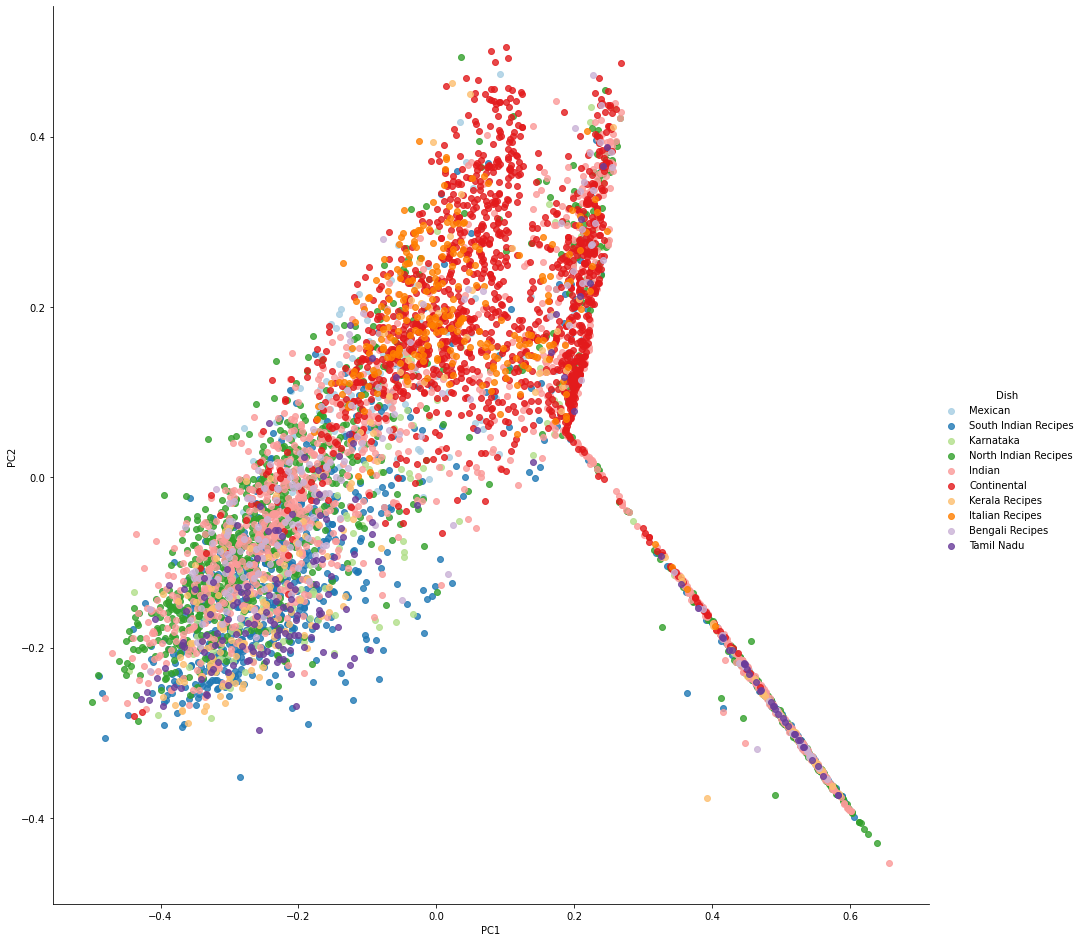

In [131]:
# Plotting the clusters
plot_pca = pd.DataFrame(data = x_pca[:,:2], columns = ["PC1","PC2"])
plot_pca["Dish"] = dish_name_list[y_subset].tolist()
sns.lmplot("PC1", "PC2", data = plot_pca, palette = "Paired",height=13, aspect=1,legend=True, hue = "Dish", fit_reg = False)

In [139]:
tsne=TSNE(metric = "precomputed",learning_rate=200, perplexity = 5)
X_tsne =tsne.fit_transform(squareform(pdist(x_subset, metric = "cosine")))
X_tsne.shape

/Users/samkatterfield/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.



(5612, 2)

/Users/samkatterfield/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



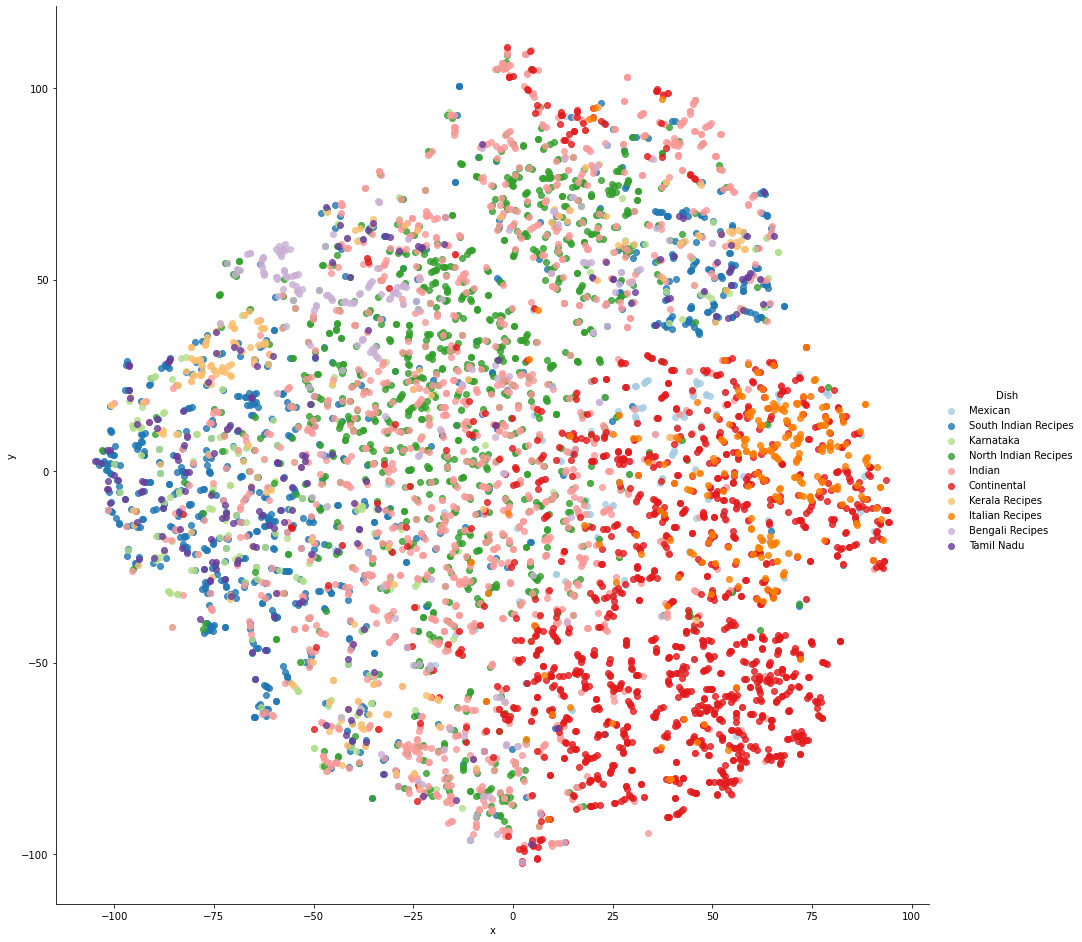

In [142]:
#did an iteration of this without 'Indian' for the presentation


#plotting t-SNE clusters 

#t-Distributed Stochastic Neighbor Embedding (t-SNE) 
#--  similar samples have a high likelihood of being picked while dissimilar points have an extremely small likelihood of being picked
# still not massively clear clusters.... too many dishes?

plot_tsne = pd.DataFrame(data = X_tsne[:,:2], columns = ["x","y"])
plot_tsne["Dish"] = dish_name_list[y_subset].tolist()
sns.lmplot("x", "y", data = plot_tsne, palette = "Paired",height=13, aspect=1,legend=True, hue = "Dish", fit_reg = False)

In [152]:
#which cuisines are most similar?

def get_recipe_cosine_similarity(dataML, cuisine, X, lim = 5):
    
    index = dataML.loc[dataML.cuisine == cuisine].index[0]
    items_M = X
    user_ing_vec = X[index]
    A = np.sqrt(np.square(user_ing_vec).sum())
    B = np.sqrt(np.square(X).sum(axis = 1))
    cosine_sim = items_M.dot(user_ing_vec.T) / (A * B)
    #sort the most similar recipes and zip them with their ids (recipe names?)
    best_id = np.argmax(cosine_sim)
    ids_sorted = np.argsort(-cosine_sim)
    return zip(dataML.loc[ids_sorted].cuisine.tolist()[0:lim], cosine_sim[ids_sorted][0:lim])

In [153]:
cuisine = "Kerala Recipes"
html = "<h4> most similar cuisines to {} according to cosine similarity</h4><ul>".format(cuisine)

for i, sim_rec in enumerate(get_recipe_cosine_similarity(dataML, cuisine, X)):
    if sim_rec[0] != cuisine:
        html += "<li>{} ({:.4}%)</li>".format(sim_rec[0], sim_rec[1]*100)
html += "</ul>"
display(HTML(html))

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([ 925,  915, 5194, 5924, 7915,\n            ...\n            4892, 5860, 5915, 5506, 4495],\n           dtype='int64', length=50). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"